In [43]:
import regex
import pandas as pd
import numpy as np
import emoji
import collections
import re
import datetime
from datetime import datetime
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [44]:
### checking for date and time format 
def date_time(s):
    pattern = r'^\[(\d{2}\.\d{2}\.\d{2}, \d{2}:\d{2}:\d{2})\]'
    result = re.match(pattern, s)
    if result:
        return True
    return False


### trying to find the author by taking a string as input
def find_author(s):
    s = s.split(":")
    if len(s) == 2:
        return True
    elif re.match(r'^\u202a\+\d{1,3}\s\d{3}\s\d{6,8}\u202c$', s[0]):
        return True
    else:
        return False
    
### extracting information such as the date, time, author, and message
def getDatapoint(line):
    splitline = line.split('] ')
    dateTime = splitline[0][1:]
    if ',' in dateTime:
        date, time = dateTime.split(',')
    else:
        # return None for date and time if they cannot be extracted
        return None, None, None, ''
    message = ' '.join(splitline[1:])
    if find_author(message):
        spliteMessage = message.split(':')
        author = spliteMessage[0]
        message = ' '.join(spliteMessage[1:])
    else:
        author = None
    if time[5] == ":":
        time = time[:5] + time[-3:]
    else:
        if 'AM' in time or 'PM' in time:
            time = time[:6] + time[-3:]
        else:
            time = time[:6]
    datetime_obj = datetime.strptime(dateTime, '%d.%m.%y, %H:%M:%S')
    date = datetime_obj.date()
    time = datetime_obj.time().strftime('%H:%M:%S')
    return date, time, author, message

In [45]:
parsedData = [] # List to keep track of data so it can be used by a Pandas dataframe

conversationPath = '/Users/nimats/Programming projects/PyML/WhatsApp/Data/Inf_TUM_chat.txt'

with open(conversationPath, encoding="utf-8") as fp:
    first = fp.readline() # Skipping first line of the file because contains information related to something about end-to-end encryption
    print(first)
    fp.readline()
    messageBuffer = [] 
    date, time, author = None, None, None
    while True:
        line = fp.readline() 
        if not line: 
            break
        line = line.strip() 
        if date_time(line): 
            if len(messageBuffer) > 0: 
                parsedData.append([date, time, author, ' '.join(messageBuffer)]) 
            messageBuffer.clear() 
            date, time, author, message = getDatapoint(line) 
            messageBuffer.append(message) 
        else:
            messageBuffer.append(line)
        

[05.10.20, 13:39:16] Informatik: ‎Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them.



In [46]:
df = pd.DataFrame(parsedData, columns=['Date', 'Time', 'Author', 'Message']) # Initialising a pandas Dataframe.
df = df.dropna()
URLPLATTERN = r'(https?://\S+)' # detecting URLs 
df['urlcount'] = df.Message.apply(lambda x: re.findall(URLPLATTERN, x)).str.len()

In [47]:
df.isnull().sum()

Date        0
Time        0
Author      0
Message     0
urlcount    0
dtype: int64

In [48]:
df = df.dropna()
df = df.reset_index(drop=True)
df.index += 1
df.shape

(2087, 5)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2087 entries, 1 to 2087
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      2087 non-null   object
 1   Time      2087 non-null   object
 2   Author    2087 non-null   object
 3   Message   2087 non-null   object
 4   urlcount  2087 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 81.7+ KB


In [50]:
df.head(30)

,Date,Time,Author,Message,urlcount
1,2021-12-01,08:52:03,Informatik,‎You joined using this group's invite link,0
2,2021-12-01,10:09:51,‪+49 176 41832946‬,Was war der Tweedback in gdb nochmal?,0
3,2021-12-01,10:10:11,‪+49 176 56750909‬,5t36,0
4,2021-12-01,11:24:16,‪+359 88 245 2115‬,"Ich finde nur eine Aufzeichnung, gibt es mehr...",0
5,2021-12-01,12:17:50,‪+49 1515 8967226‬,Keine Ahnung ob oder wann er die anderen hoch...,0
6,2021-12-01,12:32:15,‪+49 176 34671523‬,Wär schon sehr nice,0
7,2021-12-02,08:32:03,‪+49 1590 5866055‬,Ist heute kein Mathe?,0
8,2021-12-02,08:32:27,‪+49 176 56750909‬,"Nein, wegen Dius Akademikus",0
9,2021-12-02,08:34:21,‪+49 1590 5866055‬,Ah passt aber Tutorien finden statt oder?,0
10,2021-12-02,08:36:56,‪+49 176 56750909‬,"Kommt auf den Tutor an, muss du mit dem abspr...",0


In [51]:
weeks = {
    0 : 'Mon',
    1 : 'Tue',
    2 : 'Wed',
    3 : 'Thr',
    4 : 'Fri',
    5 : 'Sat',
    6 : 'Sun'
}

df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

# Extract the year from the 'Date' column
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['Day'] = df['Date'].dt.day

df['Hour'] = pd.to_datetime(df['Time']).dt.hour

df['Weekday'] = df['Date'].dt.weekday.map(weeks)
df = df[['Date','Weekday','Time','Author','Message', 'urlcount', 'Hour', 'Month', 'Year']]
df['Weekday'] = df['Weekday'].astype('category')

In [52]:
df.tail()

,Date,Weekday,Time,Author,Message,urlcount,Hour,Month,Year
2083,2023-03-30,Thr,21:16:58,‪+49 1573 4549105‬,Profit📈,0,21,3,2023
2084,2023-03-30,Thr,21:24:17,‪+49 1516 4562022‬,also wenn man eh Tutor machen will ist dieses...,0,21,3,2023
2085,2023-03-30,Thr,22:52:21,‪+49 1577 5835316‬,"Hey, Ein Freund von mir sucht aktuell eine WG...",0,22,3,2023
2086,2023-04-05,Wed,12:17:37,‪+49 171 4309744‬,Hat jemand hier vlt schon den kurs Cloud-base...,0,12,4,2023
2087,2023-04-10,Mon,09:57:15,‪+49 172 9302596‬,‎‎‪+49 172 9302596‬ changed their phone numbe...,0,9,4,2023


In [53]:
num_of_Authors = len(df.Author.unique())
print(num_of_Authors)

170


In [54]:
num_of_Links = np.sum(df.urlcount)
print(num_of_Links)

21


In [55]:
author_counts = df['Author'].value_counts().sort_values(ascending=False)
print(author_counts)

‪+43 664 4600869‬     199
‪+49 176 21828176‬    118
‪+49 176 42610367‬     97
‪+49 176 23403429‬     73
‪+49 176 34533662‬     73
                     ... 
‪+49 160 94818965‬      1
‪+82 10‑8780‑8325‬      1
‪+49 1573 8172860‬      1
‪+7 985 600‑67‑63‬      1
‪+36 70 405 8311‬       1
Name: Author, Length: 170, dtype: int64


In [56]:
total_messages = df.shape[0]
print(total_messages)

2087


In [57]:
### Counting number of letters in each message
df['Letters'] = df['Message'].apply(lambda s: len(s))

In [58]:
### Counting number of words in each message
df['Word'] = df['Message'].apply(lambda s: len(s.split(' ')))

In [59]:
df.tail()

,Date,Weekday,Time,Author,Message,urlcount,Hour,Month,Year,Letters,Word
2083,2023-03-30,Thr,21:16:58,‪+49 1573 4549105‬,Profit📈,0,21,3,2023,8,2
2084,2023-03-30,Thr,21:24:17,‪+49 1516 4562022‬,also wenn man eh Tutor machen will ist dieses...,0,21,3,2023,271,45
2085,2023-03-30,Thr,22:52:21,‪+49 1577 5835316‬,"Hey, Ein Freund von mir sucht aktuell eine WG...",0,22,3,2023,419,64
2086,2023-04-05,Wed,12:17:37,‪+49 171 4309744‬,Hat jemand hier vlt schon den kurs Cloud-base...,0,12,4,2023,180,28
2087,2023-04-10,Mon,09:57:15,‪+49 172 9302596‬,‎‎‪+49 172 9302596‬ changed their phone numbe...,0,9,4,2023,103,18


In [60]:
user = df.Author.unique()
for i in range(len(user)):
    user_stats = df[df['Author'] == user[i]]
    print(f'stats of --> {user[i]} <--')
    print(f'total number of messages sent ', user_stats.shape[0])
    avg_words_by_user = (np.sum(user_stats['Word']))//user_stats.shape[0]
    print('average words per message: ', avg_words_by_user)
    print('-'*40)
    
    

stats of --> Informatik <--
total number of messages sent  1
average words per message:  8
----------------------------------------
stats of --> ‪+49 176 41832946‬ <--
total number of messages sent  2
average words per message:  13
----------------------------------------
stats of --> ‪+49 176 56750909‬ <--
total number of messages sent  30
average words per message:  24
----------------------------------------
stats of --> ‪+359 88 245 2115‬ <--
total number of messages sent  7
average words per message:  23
----------------------------------------
stats of --> ‪+49 1515 8967226‬ <--
total number of messages sent  14
average words per message:  14
----------------------------------------
stats of --> ‪+49 176 34671523‬ <--
total number of messages sent  55
average words per message:  9
----------------------------------------
stats of --> ‪+49 1590 5866055‬ <--
total number of messages sent  19
average words per message:  9
----------------------------------------
stats of --> ‪+49 15

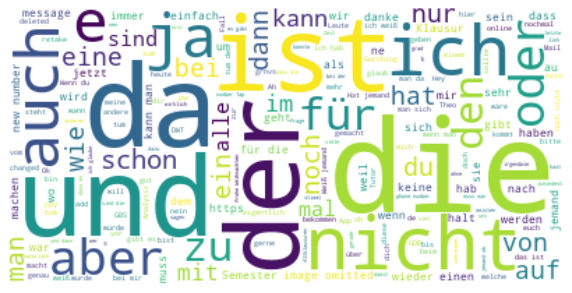

In [61]:
## Word Cloud of mostly used words in the Group
text = " ".join(review for review in df.Message)
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white').generate(text)

### Display the generated image:
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

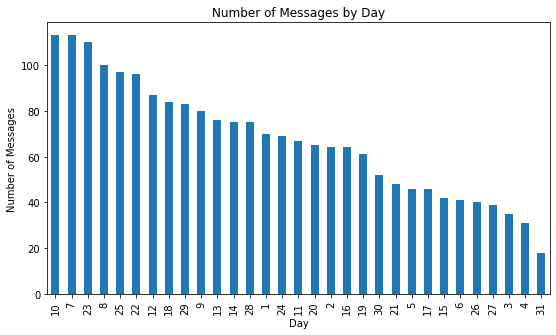

In [62]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

# Extract Year, Month, Day from the 'Date' column
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['Day'] = df['Date'].dt.day

plt.figure(figsize=(9, 5))
sns.color_palette("dark")
ax = df['Day'].value_counts().plot.bar()
ax.set_title('Number of Messages by Day')
ax.set_xlabel('Day')
ax.set_ylabel('Number of Messages')

plt.show()


Text(0, 0.5, 'Number of messages')

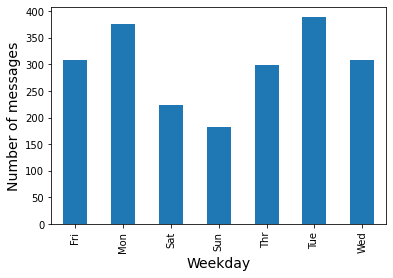

In [64]:
### mostly active day in a week
message_per_Day = df.groupby('Weekday')['Message'].count()
message_per_Day.plot.bar()
plt.xlabel('Weekday', fontdict={'fontsize': 14,'fontweight': 10})
plt.ylabel('Number of messages', fontdict={'fontsize': 14,'fontweight': 10})

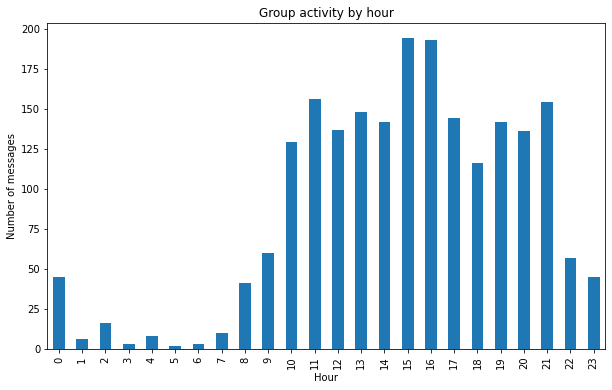

In [65]:
### the time whenever the group was highly active
df['Hour'] = pd.to_datetime(df['Time']).dt.hour
message_per_hour = df.groupby('Hour')['Message'].count()
plt.figure(figsize=(10, 6))
#plt.bar(message_per_hour.index, message_per_hour.values)
message_per_hour.plot.bar()
plt.xlabel('Hour')
plt.ylabel('Number of messages')
plt.title('Group activity by hour')
plt.show()

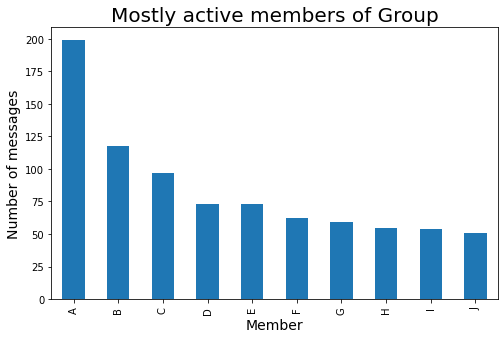

In [66]:
### Mostly Active Members in the Group
plt.figure(figsize=(8, 5))
mostly_active = df['Author'].value_counts().head(10)

### Top 10 Members that are mostly active in the Group
bars = ['A','B','C','D','E','F','G','H','I','J']
x_pos = np.arange(len(bars))
mostly_active.plot.bar()
plt.xlabel('Member',fontdict={'fontsize': 14,'fontweight': 10})
plt.ylabel('Number of messages',fontdict={'fontsize': 14,'fontweight': 10})
plt.title('Mostly active members of Group',fontdict={'fontsize': 20,'fontweight': 8})
plt.xticks(x_pos, bars)
plt.show()

<Figure size 648x360 with 0 Axes>

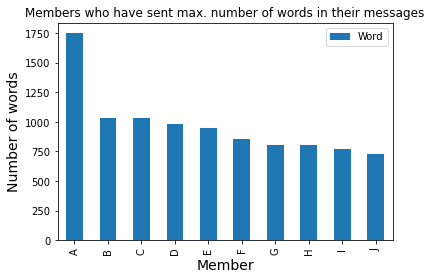

In [67]:
### Who has sent the most number of words in total
plt.figure(figsize=(9, 5))
max_words_by_user = df[['Author', 'Word']].groupby('Author').sum()
max_word_sorted = max_words_by_user.sort_values('Word', ascending = False).head(10)

bars = ['A','B','C','D','E','F','G','H','I','J']
x_pos = np.arange(len(bars))

max_word_sorted.plot.bar()
plt.xlabel('Member', fontdict={'fontsize': 14,'fontweight': 10})
plt.ylabel('Number of words', fontdict={'fontsize': 14,'fontweight': 10})
plt.title('Members who have sent max. number of words in their messages')
plt.xticks(x_pos, bars)
plt.show()

---> Author: ‪+43 664 4600869‬ <---


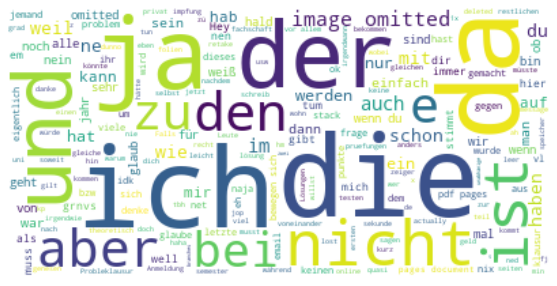

--------------------------------------------------------------------------------
---> Author: ‪+49 176 21828176‬ <---


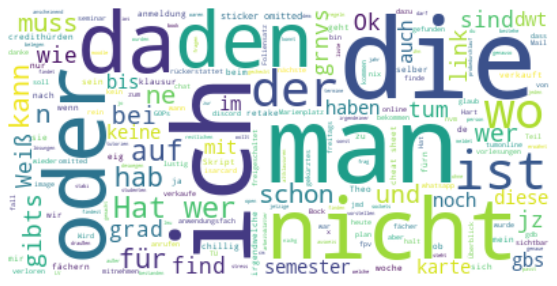

--------------------------------------------------------------------------------
---> Author: ‪+49 176 42610367‬ <---


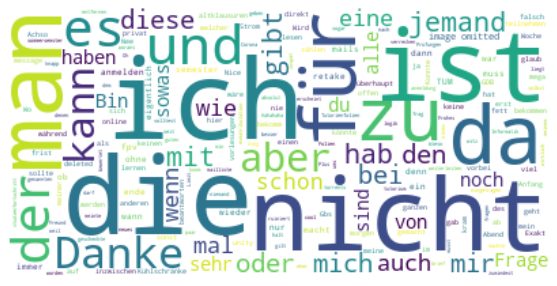

--------------------------------------------------------------------------------
---> Author: ‪+49 176 23403429‬ <---


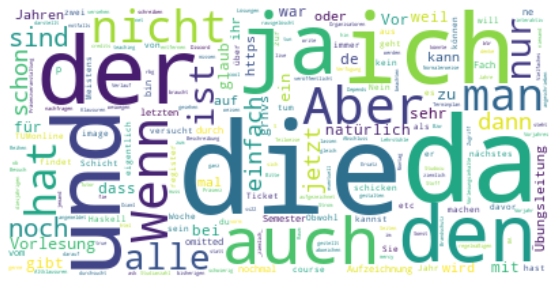

--------------------------------------------------------------------------------
---> Author: ‪+49 176 34533662‬ <---


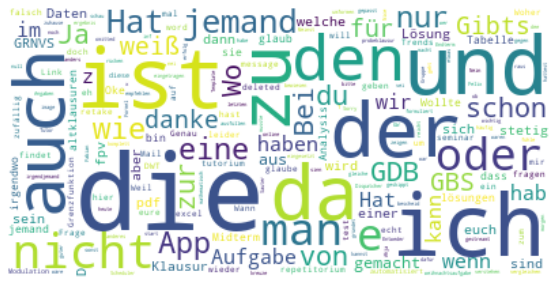

--------------------------------------------------------------------------------
---> Author: ‪+49 176 99638152‬ <---


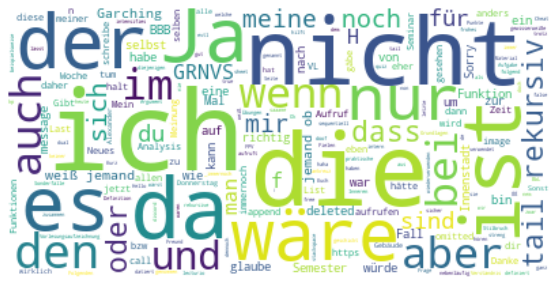

--------------------------------------------------------------------------------
---> Author: ‪+49 1512 1300570‬ <---


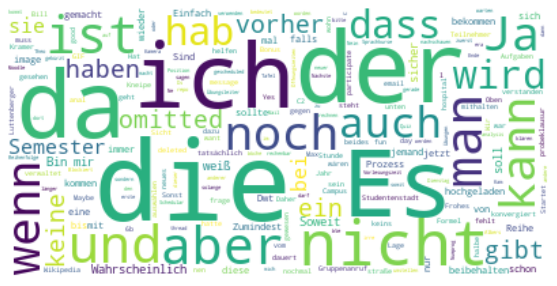

--------------------------------------------------------------------------------
---> Author: ‪+49 176 34671523‬ <---


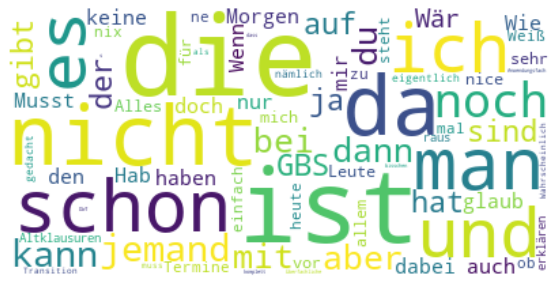

--------------------------------------------------------------------------------
---> Author: ‪+49 174 9769452‬ <---


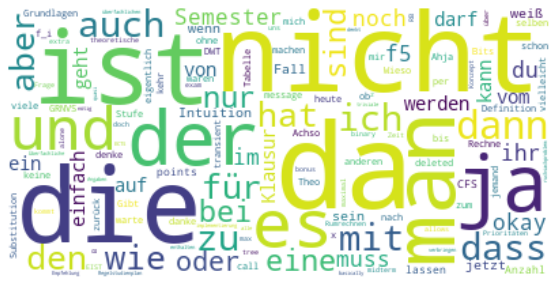

--------------------------------------------------------------------------------
---> Author: ‪+41 78 971 91 91‬ <---


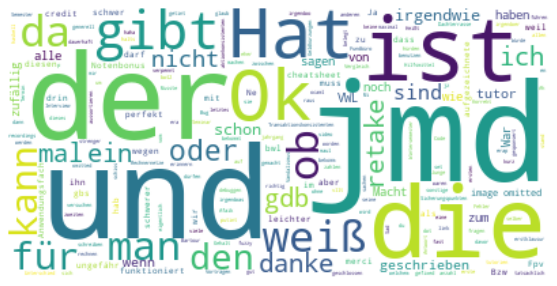

--------------------------------------------------------------------------------


In [68]:
### creating a word cloud of Top-10 highly active members
top10_active_members = df['Author'].value_counts().head(10)

bars = ['A','B','C','D','E','F','G','H','I','J']
x_pos = np.arange(len(bars))

for author in top10_active_members.index:
    member_chat = df[df['Author'] == author]
    print(f'---> Author: {author} <---')
    # Word Cloud of mostly used word in the Group
    msg = ' '.join(x for x in member_chat.Message)
    wordcloud = WordCloud(stopwords=STOPWORDS, background_color="white").generate(msg)
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    print('-'*80)


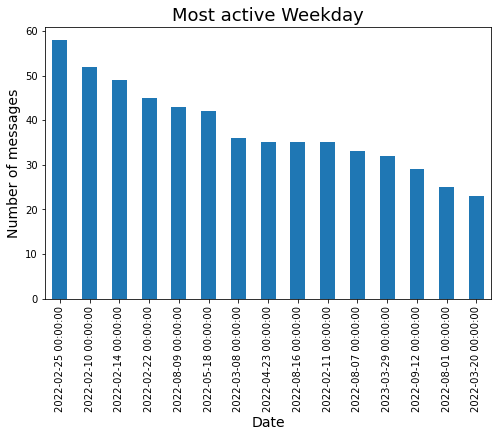

In [69]:
### the date on which our group was highly active

plt.figure(figsize=(8,5))
df['Date'].value_counts().head(15).plot.bar()
plt.xlabel('Date',fontdict={'fontsize': 14,'fontweight': 10})
plt.ylabel('Number of messages',fontdict={'fontsize': 14,'fontweight': 10})
plt.title('Most active Weekday',fontdict={'fontsize': 18,'fontweight': 8})
plt.show()

In [70]:
### Time series plot Number of messages

dates = df['Date'].value_counts() 
dates2dict = dates.to_dict() #converts to dictionary
df['Msg_count'] = df['Date'].map(dates2dict)

### Timeseries plot 
fig = px.line(x=df['Date'],y=df['Msg_count'])
fig.update_layout(title='Number of messages using TimeSeries plot',
                  title_x=0.5,
                  xaxis_title='Month',
                  yaxis_title='Number of Messages')
fig.update_xaxes(nticks=20)
fig.show()

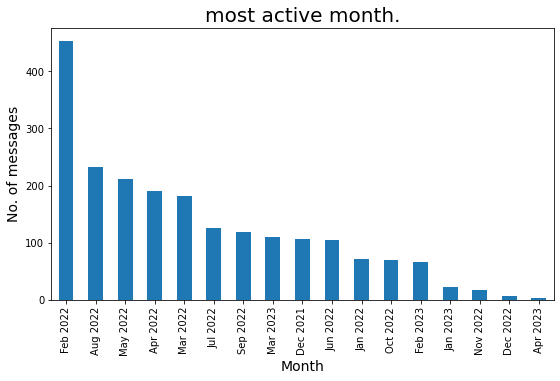

In [71]:
### creating a separate column for Month

months = {
     1 : 'Jan',
     2 : 'Feb',
     3 : 'Mar',
     4 : 'Apr',
     5 : 'May',
     6 : 'Jun',
     7 : 'Jul',
     8 : 'Aug',
     9 : 'Sep',
    10 : 'Oct',
    11 : 'Nov',
    12 : 'Dec'
}

df['Month'] = df['Month'].map(months)
df['Month_Year'] = df['Month'].str.capitalize() + ' ' + df['Year'].astype(str)


### Most Active month
plt.figure(figsize=(9, 5))
active_month = df['Month_Year'].value_counts()
active_month.plot.bar()
plt.xlabel('Month',fontdict={'fontsize': 14,'fontweight': 10})
plt.ylabel('No. of messages',fontdict={'fontsize': 14,'fontweight': 10})
plt.title('most active month.',fontdict={'fontsize': 20,
        'fontweight': 8})
plt.show()

In [72]:
df.head()

,Date,Weekday,Time,Author,Message,urlcount,Hour,Month,Year,Letters,Word,Day,Msg_count,Month_Year
1,2021-12-01,Wed,08:52:03,Informatik,‎You joined using this group's invite link,0,8,Dec,2021,43,8,1,6,Dec 2021
2,2021-12-01,Wed,10:09:51,‪+49 176 41832946‬,Was war der Tweedback in gdb nochmal?,0,10,Dec,2021,38,8,1,6,Dec 2021
3,2021-12-01,Wed,10:10:11,‪+49 176 56750909‬,5t36,0,10,Dec,2021,5,2,1,6,Dec 2021
4,2021-12-01,Wed,11:24:16,‪+359 88 245 2115‬,"Ich finde nur eine Aufzeichnung, gibt es mehr...",0,11,Dec,2021,108,15,1,6,Dec 2021
5,2021-12-01,Wed,12:17:50,‪+49 1515 8967226‬,Keine Ahnung ob oder wann er die anderen hoch...,0,12,Dec,2021,56,11,1,6,Dec 2021


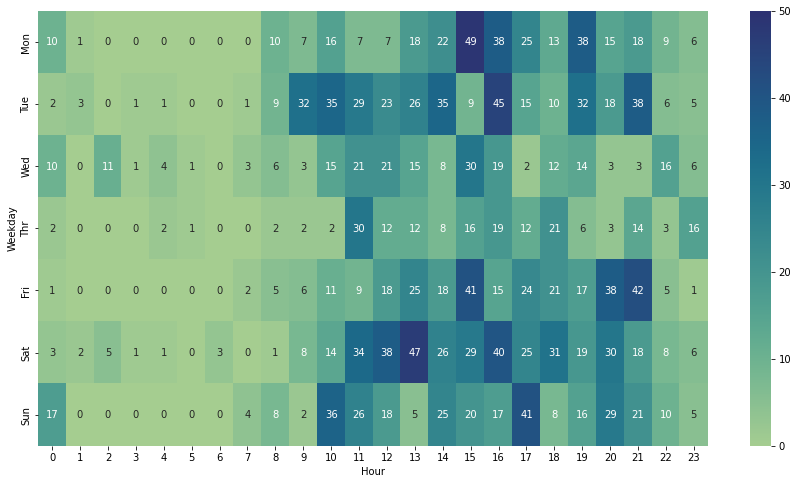

In [73]:
### Creating a heatmap to show the highly active time of the WhatsApp group

df2 = df.groupby(['Hour', 'Weekday'], as_index=False)['Message'].count()
df2 = df2.dropna()
df2.reset_index(drop=True, inplace=True)

weekdays = ['Mon', 'Tue', 'Wed', 'Thr', 'Fri', 'Sat', 'Sun']
plt.figure(figsize=(15, 8))

active_time = df2.pivot(index='Weekday', columns='Hour', values='Message')
sns.heatmap(active_time, annot=True, cmap="crest", vmax=50, yticklabels=weekdays)
plt.show()

In [74]:
### Emojis

def split_count(text):
    emoji_list = []
    data = re.findall(r'[^\s\u1f300-\u1f5ff]', text)
    for word in data:
        if any(char in emoji.EMOJI_DATA for char in word):
            emoji_list.append(word)
    return emoji_list

df["emoji"] = df["Message"].apply(split_count)
emojis = sum(df['emoji'].str.len())
print("Emojis:", emojis)

Emojis: 482


In [75]:
### Counting the total number of unique emojis
total_emojis_list = list(set([a for b in df.emoji for a in b]))
total_emojis = len(total_emojis_list)
print(total_emojis)

92


In [76]:
total_emojis_list = list([a for b in df.emoji for a in b])
emoji_dict = dict(collections.Counter(total_emojis_list))
emoji_dict = sorted(emoji_dict.items(), key=lambda x: x[1], reverse=True)

emoji_df = pd.DataFrame(emoji_dict, columns=['emoji', 'count'])
emoji_df

,emoji,count
0,🎄,81
1,😂,56
2,🌲,49
3,😅,44
4,🏼,21
...,...,...
87,🫶,1
88,🙋,1
89,😕,1
90,😩,1


In [77]:
fig = px.pie(emoji_df, values='count', names='emoji',
             title='Emoji Distribution')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(width=800, height=600)
fig.show()

In [78]:
# Emojis used by the top10 active members
top10_active_members = df['Author'].value_counts().head(10)

for i in range(len(top10_active_members)):
    author = top10_active_members.index[i]
    dummy_df = df[df['Author'] == author]
    total_emojis_list = list([a for b in dummy_df.emoji for a in b])
    emoji_dict = dict(collections.Counter(total_emojis_list))
    emoji_dict = sorted(emoji_dict.items(), key=lambda x: x[1], reverse=True)
    print('Emoji Distribution for', author)
    author_emoji_df = pd.DataFrame(emoji_dict, columns=['emoji', 'count'])
    fig = px.pie(author_emoji_df, values='count', names='emoji')
    fig.update_traces(textposition='inside', textinfo='percent+label')
    fig.show()


Emoji Distribution for ‪+43 664 4600869‬


Emoji Distribution for ‪+49 176 21828176‬


Emoji Distribution for ‪+49 176 42610367‬


Emoji Distribution for ‪+49 176 23403429‬


Emoji Distribution for ‪+49 176 34533662‬


Emoji Distribution for ‪+49 176 99638152‬


Emoji Distribution for ‪+49 1512 1300570‬


Emoji Distribution for ‪+49 176 34671523‬


Emoji Distribution for ‪+49 174 9769452‬


Emoji Distribution for ‪+41 78 971 91 91‬
